## Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos

### Se importan las librerias necesarias para resolver el ejercicio:

- pandas
- numpy
- matplotlib
- sqlite3


In [15]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

## 1. Importacion del dataset

### Se carga el archivo `datasets_calificaciones.csv` en un DataFrame.


In [61]:
df = pd.read_csv('./datasets_calificaciones.csv')
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


# 2. Exploracion de los datos

### Se utilizan metodos de pandas para explorar la estructura y contenido del dataframe


In [62]:
print(f'1-info basica del dataframe:  {df.info()}\n' )
print(f'2-estadisticas basicas del dataframe:  {df.describe(include="all")}\n' )
print(f'3-dimension del dataframe:  {df.shape}\n' )
print(f'4-nombres de las columnas:  {df.columns}\n' )
print(f'5-tipos de datos:  {df.dtypes}\n' )
print(f'6-valores nulos:  {df.isnull().sum()}\n' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
1-info basica del dataframe:  None

2-estadisticas basicas del dataframe:            estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
count            100          100        95        90    89        100
unique            96            7        49        45    46         35
top     joaquín ruiz  matematicas                 7.5   9.5        99%
freq               2           25         7         5     4          5

3-dimension del dataframe:  (100, 6)

4-nombres de las columnas:  Index(['estudiante', 'Materia', 'Parcial

# 3. limpieza de datos

- se reemplazan strings vacios
- se convierten 'calificaciones' a tipo numerico
- se limpia y convierte 'asistencia' quitando el '%' y convirtiendo a tipo numerico.
- se corrigen asistencias > 100%
- los NaN restantes serán reemplazados por la media de cada columna

- se verifica la limpieza con info y isnull.sum de nuevo para confirmar


In [67]:
# reemplazar strings vacios
df = df.replace(' ', np.nan)

# se definen grupos de colums
calif_cols = ['Parcial 1', 'Parcial 2', 'Final']
asist_col = 'Asistencia'
# columnas de texto
text_cols = ['estudiante', 'Materia']
# columnas numericas
num_cols = calif_cols + [asist_col]

# convertir calificaciones a numerico
for col in calif_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# limpiar asistencias
df[asist_col] = df[asist_col].astype(str).str.replace('%', '', regex=False)
df[asist_col] = pd.to_numeric(df[asist_col], errors='coerce')
df.loc[df[asist_col] > 100, asist_col] = 100

# reemplazar valores faltantes por la media
for col in num_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

#normalizar texto a 'title'
for col in text_cols:
    df[col] = df[col].str.title()

print('Verificación de limpieza:')
print('Info:')
df.info()
print(f'valores nulos por columna:  {df.isnull().sum()}' )
print(f'head: {df.head()}')

Verificación de limpieza:
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   100 non-null    float64
 3   Parcial 2   100 non-null    float64
 4   Final       100 non-null    float64
 5   Asistencia  100 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
valores nulos por columna:  estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64
head:         estudiante      Materia  Parcial 1  Parcial 2     Final  Asistencia
0        Ana Pérez  Matematicas   8.000000        7.5  9.000000          95
1     Carlos López       Fisica   6.200000        7.0  7.894118          88
2      María Gómez      Quimica   9.000000        8.8  9.500000         100
3  Pedro Rodríguez     Histo

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_21528\329083647.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean, inplace=True)


# 4. Estadisticas descriptivas

una vez se limpian los datos, se generan estadisticas descriptivas para las columns numericas, ademas se agrupan datos por 'Materia' y se calcula la media de 'calificaciones' y 'asistencia' por cada.


In [64]:
print(f'{df[num_cols].describe()}\n' )

print(f'{df.groupby("Materia")[num_cols].mean()}\n' )

        Parcial 1   Parcial 2       Final  Asistencia
count  100.000000  100.000000  100.000000  100.000000
mean     7.831818    7.830682    7.894118   88.180000
std      1.134184    1.108950    1.111133    8.445165
min      5.500000    5.800000    5.700000   70.000000
25%      7.075000    6.975000    7.100000   81.750000
50%      7.831818    7.830682    7.894118   88.500000
75%      8.800000    8.800000    8.825000   96.000000
max      9.900000    9.900000    9.900000  100.000000

                      Parcial 1  Parcial 2     Final  Asistencia
Materia                                                         
Ciencias Sociales      9.500000   9.100000  7.894118   98.000000
Fisica                 6.573295   6.849669  6.624755   82.208333
Historia               7.375000   7.026278  7.482353   80.083333
Literatura Universal   8.000000   7.800000  8.200000   85.000000
Matematicas            8.087636   8.261818  8.471059   92.680000
Programacion Basica    7.831818   5.900000  6.300000   82.

# 5. Analisis de datos

se utiliza matplob para representar los datos en graficos

- histograma
- grafico de barras


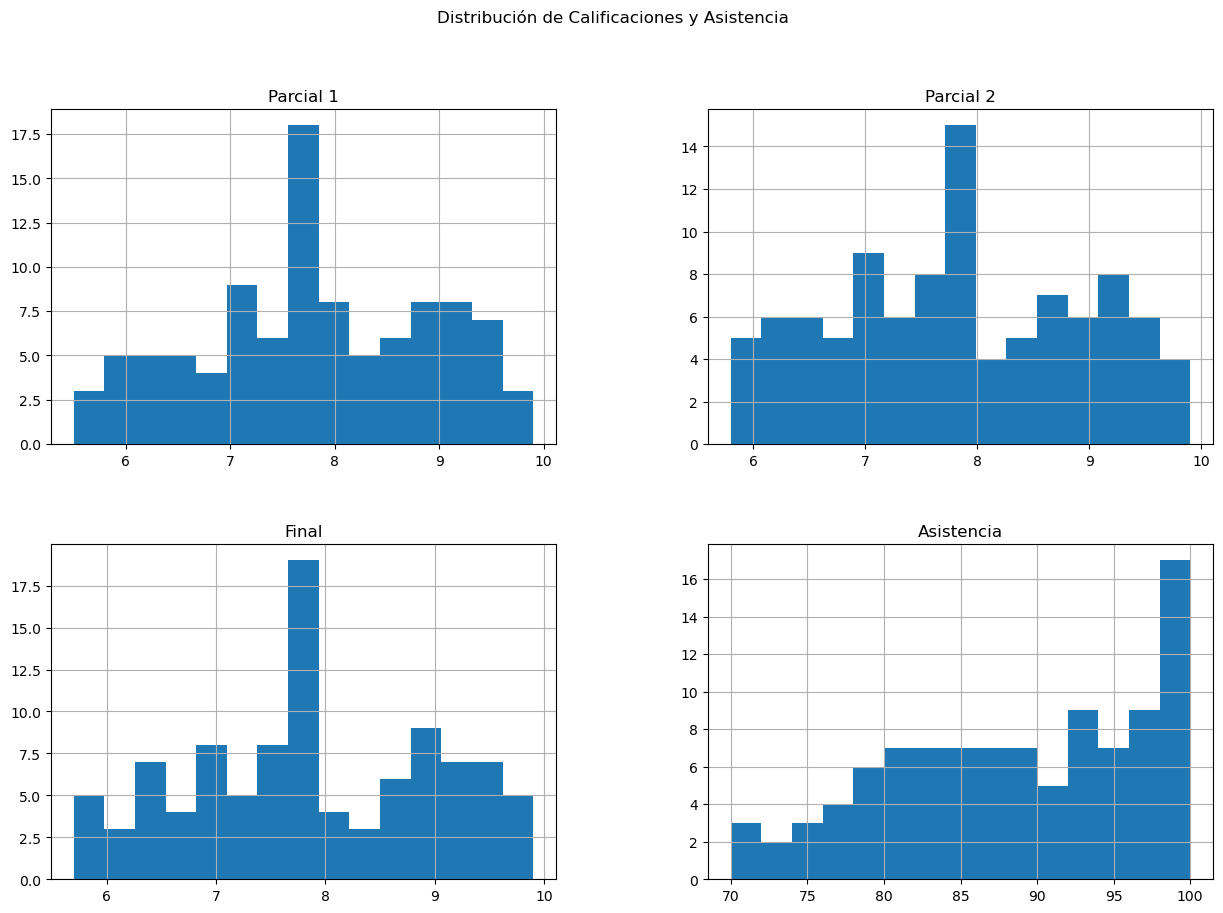

In [65]:
# histograma de calificaciones y asistencia
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Distribución de Calificaciones y Asistencia')
plt.show()

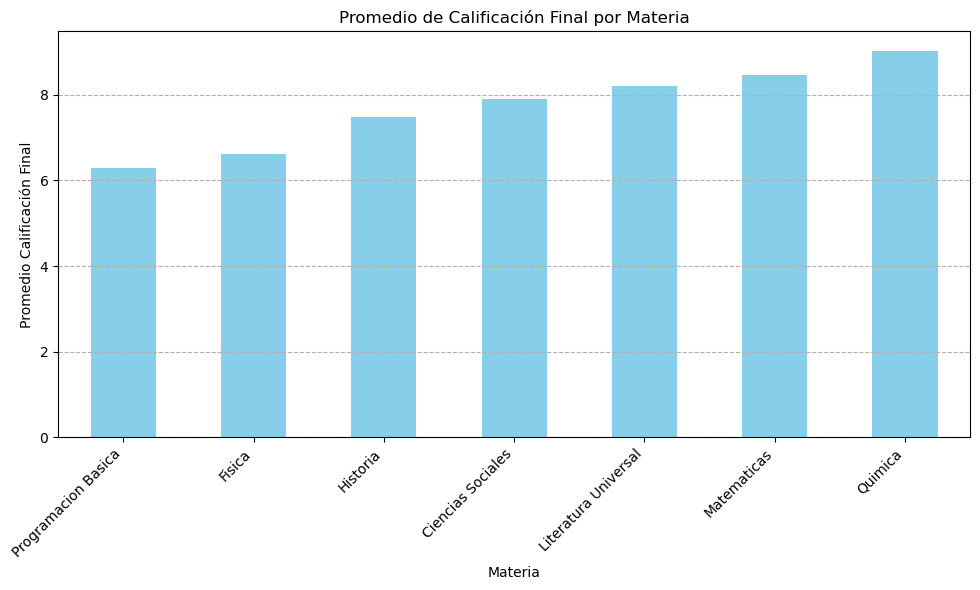

In [68]:
promedio_final_materia = df.groupby('Materia')['Final'].mean().sort_values()
plt.figure(figsize=(10, 6))
promedio_final_materia.plot(kind='bar', color='skyblue')
plt.title('Promedio de Calificación Final por Materia')
plt.xlabel('Materia')
plt.ylabel('Promedio Calificación Final')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

(array([0.23809524, 0.0952381 , 0.14285714, 0.23809524, 0.0952381 ,
        0.19047619, 0.28571429, 0.23809524, 0.28571429, 0.23809524,
        0.80952381, 0.14285714, 0.14285714, 0.23809524, 0.19047619,
        0.28571429, 0.23809524, 0.19047619, 0.23809524, 0.23809524]),
 array([5.7 , 5.91, 6.12, 6.33, 6.54, 6.75, 6.96, 7.17, 7.38, 7.59, 7.8 ,
        8.01, 8.22, 8.43, 8.64, 8.85, 9.06, 9.27, 9.48, 9.69, 9.9 ]),
 [<matplotlib.patches.Polygon at 0x25781578a70>])

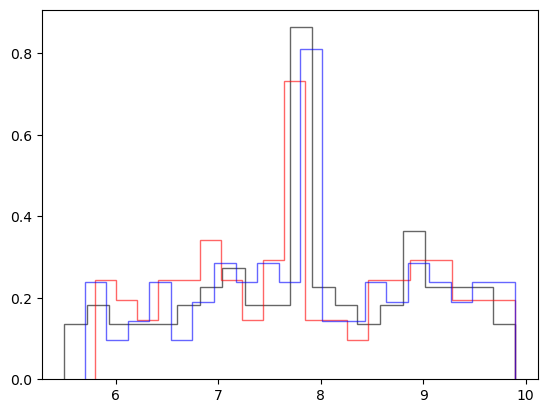

In [66]:
plt.hist(df['Parcial 1'].dropna(), bins=20, alpha=0.6, edgecolor='black', label='Parcial 1', density=True, histtype="step")
plt.hist(df['Parcial 2'].dropna(), bins=20, alpha=0.6, edgecolor='red', label='Parcial 2', density=True, histtype="step")
plt.hist(df['Final'].dropna(), bins=20, alpha=0.6, edgecolor='blue', label='Final', density=True, histtype="step")

# 6. Exportación a Archivo SQLite


In [69]:
db_name = 'calificaciones_db.sqlite'
table_name = 'calificaciones'
conn = sqlite3.connect(db_name)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()
print(f"dataframe exportado exitosamente en la base de datos '{db_name}'")

dataframe exportado exitosamente en la base de datos 'calificaciones_db.sqlite'
